In [4]:
#imnport the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#use a predefined style plot
plt.style.use('ggplot')

In [6]:
#import faker
from faker import Faker
fake = Faker()

In [13]:
#to ensure the results are reproducible
fake.random.seed(4321)

names_list = []

fake = Faker()
for _ in range(100):
  names_list.append(fake.name())

# To ensure the results are reproducible
np.random.seed(7)

salaries = []
for _ in range(100):
    salary = np.random.randint(1000,2500)
    salaries.append(salary)

In [14]:
# Create pandas DataFrame
salary_df = pd.DataFrame(
    {'Person': names_list,
     'Salary (in USD)': salaries
    })

# Print a subsection of the DataFrame
print(salary_df.head())

              Person  Salary (in USD)
0        Jason Brown             1175
1        Jacob Stein             2220
2         Cody Brown             1537
3      Larry Morales             1502
4  Jessica Hendricks             1211


In [15]:
salary_df.at[16, 'Salary (in USD)'] = 23
salary_df.at[65, 'Salary (in USD)'] = 17

# Verify if the salaries were changed
print(salary_df.loc[16])
print(salary_df.loc[65])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
Name: 16, dtype: object
Person             Joyce Bishop
Salary (in USD)              17
Name: 65, dtype: object


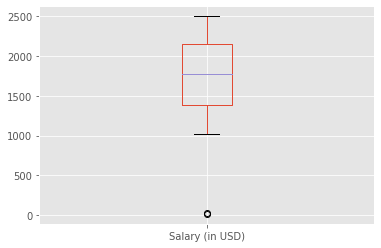

In [16]:
# Generate a Boxplot
salary_df['Salary (in USD)'].plot(kind='box')
plt.show()

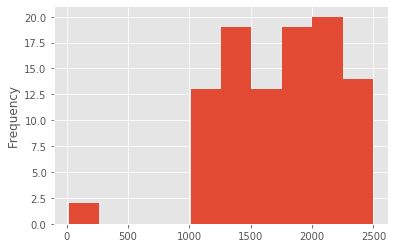

In [17]:
# Generate a Histogram plot
salary_df['Salary (in USD)'].plot(kind='hist')
plt.show()

In [18]:
# Minimum and maximum salaries
print('Minimum salary ' + str(salary_df['Salary (in USD)'].min()))
print('Maximum salary ' + str(salary_df['Salary (in USD)'].max()))

Minimum salary 17
Maximum salary 2498


In [20]:
# Convert the salary values to a numpy array
salary_raw = salary_df['Salary (in USD)'].values
salary_raw

array([1175, 2220, 1537, 1502, 1211, 1919, 2372, 2209, 2422, 1535, 1345,
       1366, 1554, 1730, 1904, 2191,   23, 2456, 1391, 1940, 2099, 1823,
       1250, 2030, 2468, 2068, 2349, 2176, 1183, 1949, 2136, 1763, 2213,
       1290, 1312, 1201, 2486, 1550, 1772, 1494, 2161, 2219, 2096, 1944,
       1257, 1400, 2398, 2373, 1940, 1604, 1764, 1279, 1745, 1803, 2472,
       2341, 2415, 2175, 1092, 1759, 2248, 1356, 1931, 1481, 1579,   17,
       1481, 2043, 1923, 1787, 1033, 2147, 2310, 1741, 1989, 2439, 2154,
       2107, 1402, 1021, 1203, 1047, 1784, 1524, 1349, 1107, 1393, 1844,
       1622, 1654, 1636, 1276, 1309, 1827, 1035, 1260, 1456, 2498, 2007,
       2239])

In [25]:
# For compatibility with the SciPy implementation
salary_raw = salary_raw.reshape(-1, 1)
salary_raw = salary_raw.astype('float64')

In [33]:
# Import kmeans from SciPy
from scipy import cluster
from scipy.cluster.vq import vq, kmeans

In [34]:
# Specify the data and the number of clusters to kmeans()
centroids, avg_distance = kmeans(salary_raw, 4)

In [35]:
# Get the groups (clusters) and distances
groups, cdist = cluster.vq.vq(salary_raw, centroids)

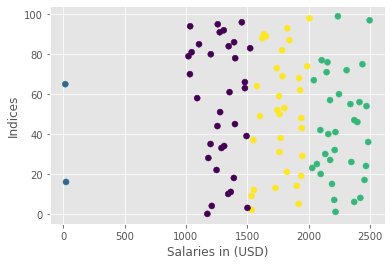

In [36]:
plt.scatter(salary_raw, np.arange(0,100), c=groups)
plt.xlabel('Salaries in (USD)')
plt.ylabel('Indices')
plt.show()

In [37]:
#Anomaly detection as a Classification problem

# First assign all the instances to 
salary_df['class'] = 0

# Manually edit the labels for the anomalies
salary_df.at[16, 'class'] = 1
salary_df.at[65, 'class'] = 1

# Veirfy 
print(salary_df.loc[16])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
class                                  1
Name: 16, dtype: object


In [38]:
salary_df.head()

,Person,Salary (in USD),class
0,Jason Brown,1175,0
1,Jacob Stein,2220,0
2,Cody Brown,1537,0
3,Larry Morales,1502,0
4,Jessica Hendricks,1211,0


In [40]:
# Importing KNN module from PyOD
from pyod.models.knn import KNN

In [42]:
# Segregate the salary values and the class labels 
X = salary_df['Salary (in USD)'].values.reshape(-1,1)
y = salary_df['class'].values

In [43]:
# Train kNN detector
clf = KNN(contamination=0.02, n_neighbors=5)
clf.fit(X)

KNN(algorithm='auto', contamination=0.02, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [44]:
# Get the prediction labels of the training data
y_train_pred = clf.labels_ 

In [45]:
# Outlier scores
y_train_scores = clf.decision_scores_

In [46]:
# Import the utility function for model evaluation
from pyod.utils import evaluate_print

# Evaluate on the training data
evaluate_print('KNN', y, y_train_scores)

KNN ROC:1.0, precision @ rank n:1.0


In [47]:
# A salary of $37 (an anomaly right?)
X_test = np.array([[37.]])

In [48]:
# Check what the model predicts on the given test data point
clf.predict(X_test)

array([1])

In [49]:
# A salary of $1256
X_test_abnormal = np.array([[1256.]])

# Predict
clf.predict(X_test_abnormal)

array([0])